## Content list

#### 1. Import libraries
#### 2. Load data
#### 3 Run CNN model
#### 4. Model evaluation

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## 2. Load data

In [2]:
#download the weather images and put them in a directory
path = r'C:\Users\Admin\Desktop\Data Analysis\Maching Learning\Climate_Win\02 Data\Original Data\weather-dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


## 3. Run CNN model

In [4]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [5]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 35, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size-1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size-1,
)

train_generator.n // train_generator.batch_size - 1

Epoch 1/35


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 333ms/step - accuracy: 0.4335 - loss: 0.1662 - val_accuracy: 0.7292 - val_loss: 0.1002
Epoch 2/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7176 - loss: 0.1118 - val_accuracy: 0.8750 - val_loss: 0.0952
Epoch 3/35


C:\Users\Admin\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.7298 - loss: 0.0870 - val_accuracy: 0.6771 - val_loss: 0.0989
Epoch 4/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6586 - loss: 0.1020 - val_accuracy: 0.7812 - val_loss: 0.0841
Epoch 5/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.7998 - loss: 0.0729 - val_accuracy: 0.7812 - val_loss: 0.0813
Epoch 6/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8762 - loss: 0.0563 - val_accuracy: 0.8125 - val_loss: 0.0774
Epoch 7/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - accuracy: 0.8260 - loss: 0.0634 - val_accuracy: 0.8125 - val_loss: 0.0677
Epoch 8/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8461 - loss: 0.0586 - val_accuracy: 0.6875 - val_loss: 0.1131
Epoch 9/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.8264 - loss: 0.0644 - val_accuracy: 0.8438 - val_loss: 0.0607
Epoch 10/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8484 - loss: 0.0543 - val_accuracy: 0.8438 - val_los

27

## 4. Model evaluation

In [6]:
results = pd.DataFrame(model.history.history)

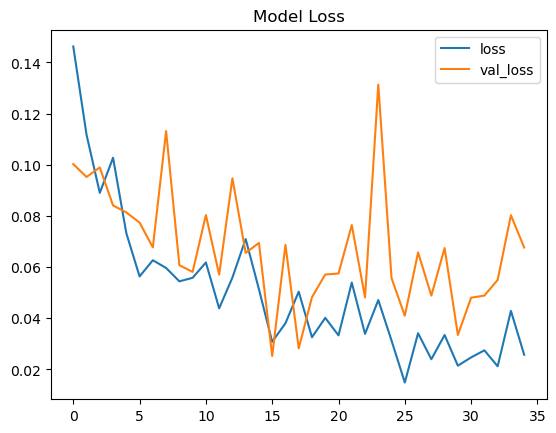

In [7]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

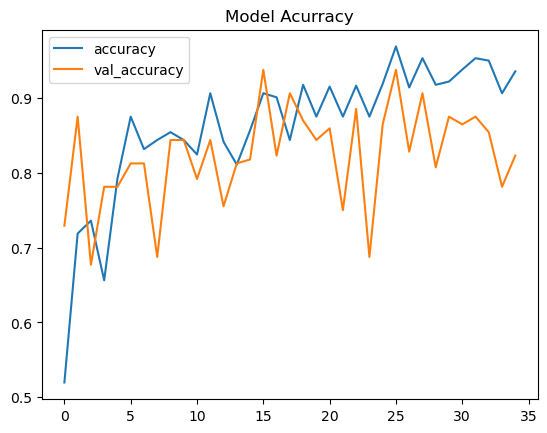

In [8]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [9]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9354838728904724, Val_Accuracy: 0.8229166865348816
Loss: 0.025702083483338356, Val_Loss: 0.06761915981769562


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


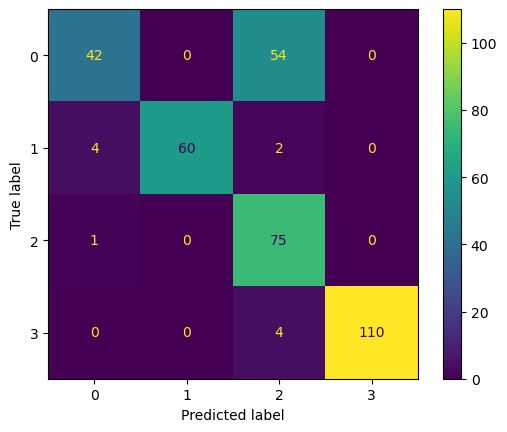

In [10]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [11]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


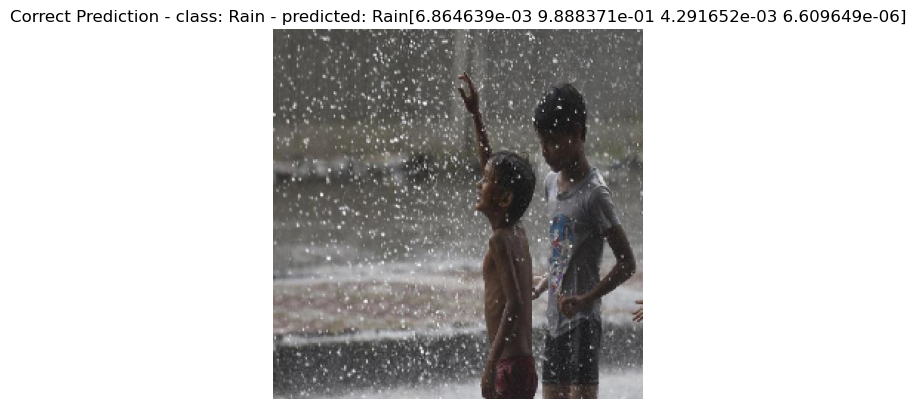

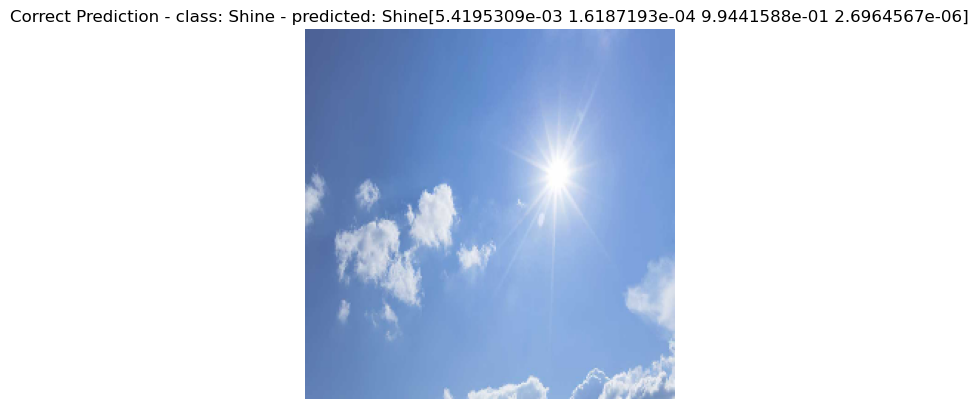

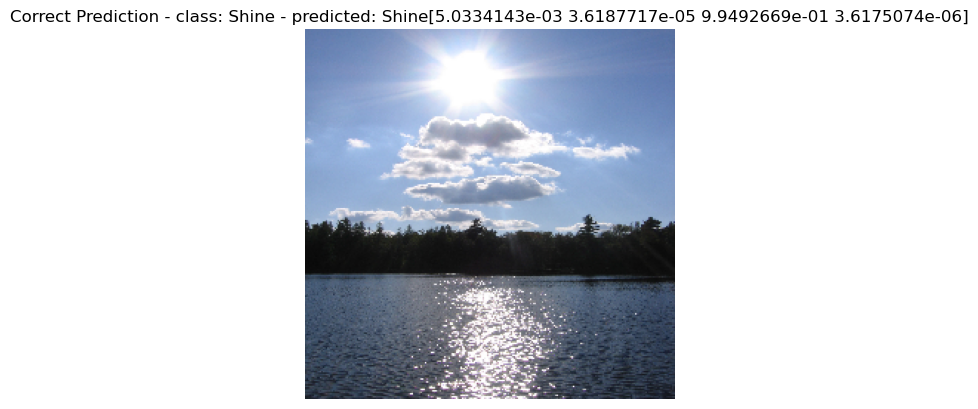

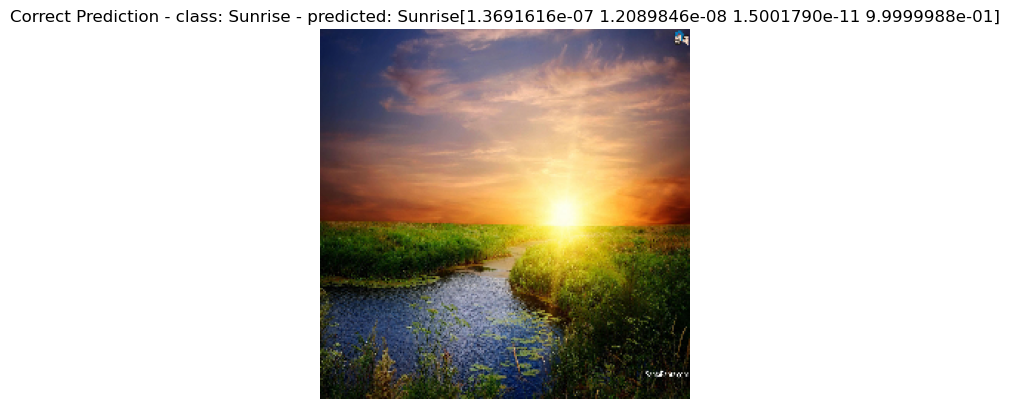

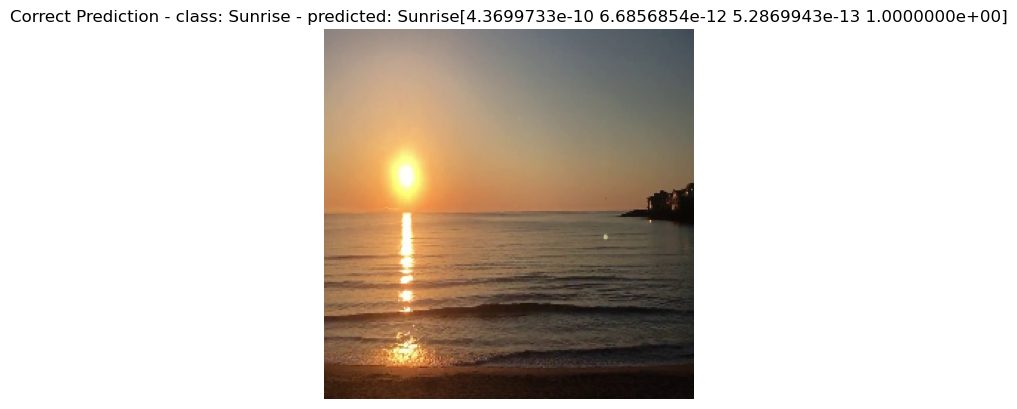

In [12]:
predict_one(model, 5) #<--you can show multiple pictures with this command. Just fill in the number you want to see.